**Project : Heart Attack Analysis & Prediction**

Project Introduction:

1.   **Project Introduction**
  
  **Goal**
  
  The goal of this project is to predict the likelihood of heart attack occurrence based on various health indicators and demographic factors. By analyzing a dataset with medical and lifestyle information, we aim to develop a machine learning model that can help in early detection and prevention of heart attacks.

  **Motivation**

  Heart disease remains one of the leading causes of death globally. Early detection and timely intervention can significantly improve patient outcomes and reduce the mortality rate associated with heart attacks. However, predicting heart attack risk based on various health metrics and lifestyle factors can be challenging due to the complexity and interplay of these variables.

2.   **Dataset Description**

  The "Heart Attack Analysis & Prediction Dataset" comprises 303 records of patients, each described by 14 attributes. The dataset size and structure are appropriate for a binary classification problem, focusing on predicting heart attack risk based on various health indicators.
  
  The dataset used in this project contains medical records of 303 patients, each described by 14 attributes, which include:
  * age: Age of the patient
  * sex: Gender of the patient (0 = female, 1 = male)
  * cp: Chest pain type (0-3)
  * trtbps: Resting blood pressure (in mm Hg)
  * chol: Cholesterol level (in mg/dl)
  * fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
  * restecg: Resting electrocardiographic results (0-2)
  * thalachh: Maximum heart rate achieved
  * exng: Exercise-induced angina (1 = yes, 0 = no)
  * oldpeak: ST depression induced by exercise relative to rest
  * slp: Slope of the peak exercise ST segment (0-2)
  * caa: Number of major vessels colored by fluoroscopy (0-4)
  * thall: Thalassemia (0-3)
  * output: Target variable indicating heart attack risk (1 = more likely, 0 = less likely)





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE





  3.  **Data Source and Citation**

      **Data Source**
      
      The dataset used in this project is titled "Heart Attack Analysis & Prediction Dataset" and is publicly available on Kaggle. It was compiled by Rashik Rahman Pritom and contains medical and demographic data related to heart attack analysis and prediction. The data includes a variety of health indicators such as age, gender, cholesterol levels, resting blood pressure, and other relevant features that are critical in assessing heart attack risk.

      **Citation**
      
      When referencing this dataset in any publications or reports, please use the following citation in APA format:
      Rahman Pritom, R. (2020). Heart Attack Analysis & Prediction Dataset [Data set]. Kaggle. https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

4.   **Data Cleaning and Exploratory Data Analysis**

      Handling Missing Values, Checking for Duplicates, Encoding Categorical Variables and Standardizing Numerical Features. These are some of the parameters refererenced for EDA.
      

In [ ]:
# Load the dataset
file_path = 'sample_data/heart.csv'
heart_data = pd.read_csv(file_path)
heart_data = heart_data.iloc[1:]

numeric_columns = heart_data.columns.drop('output')
heart_data[numeric_columns] = heart_data[numeric_columns].apply(pd.to_numeric)

print("DataFrame Information:")
print(heart_data.info())

print("\nMissing Values:")
print(heart_data.isnull().sum())

heart_data.dropna(inplace=True)

columns_to_replace_zeros = ['trtbps', 'chol', 'thalachh', 'oldpeak']
heart_data[columns_to_replace_zeros] = heart_data[columns_to_replace_zeros].replace(0, np.nan)
heart_data.fillna(heart_data.mean(), inplace=True)

for column in heart_data.columns:
    unique_values = heart_data[column].unique()
    print(f"Unique values in {column}: {unique_values}")


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 1 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None

Missing Values:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall 

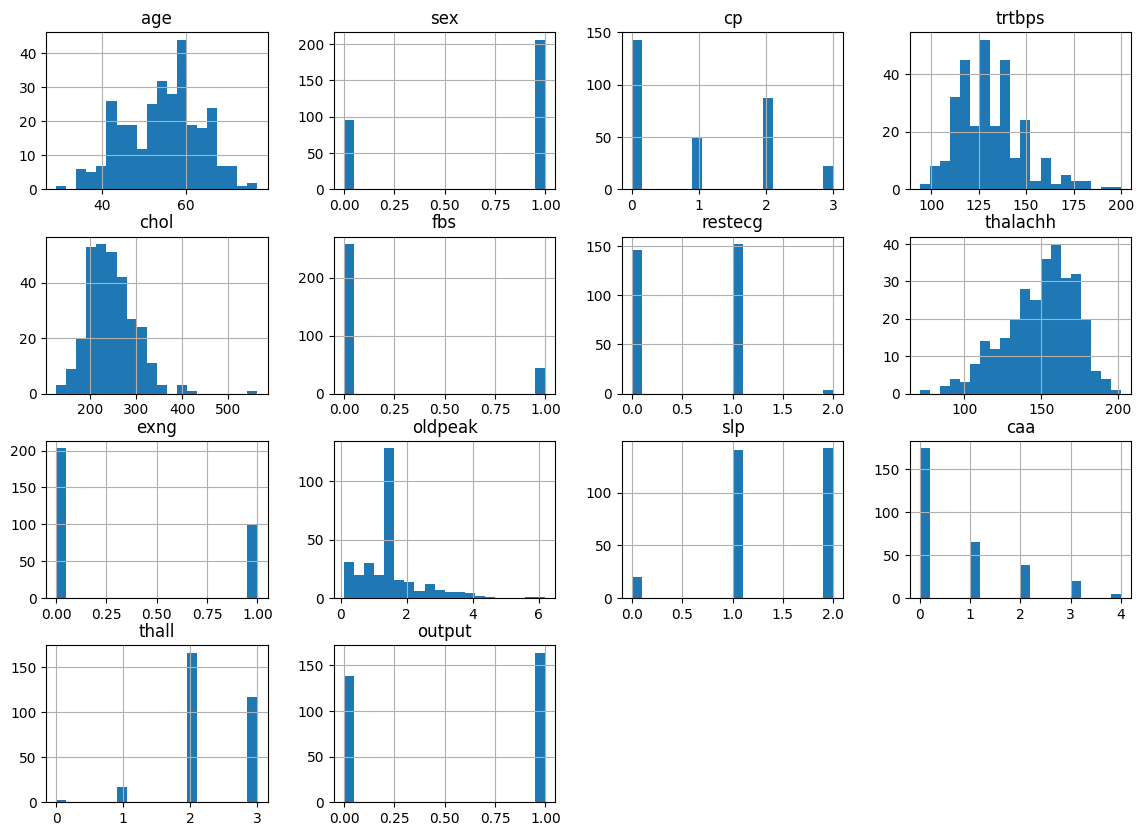

In [ ]:
heart_data.hist(bins=20, figsize=(14, 10))
plt.show()

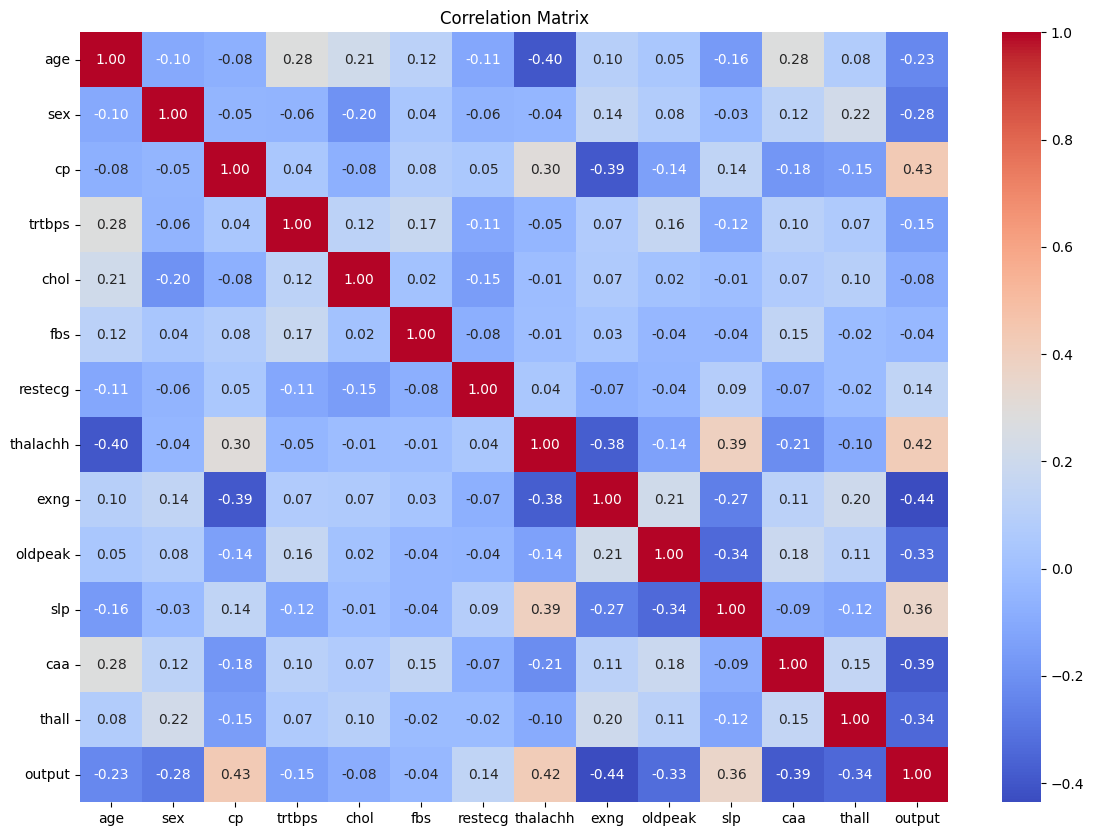

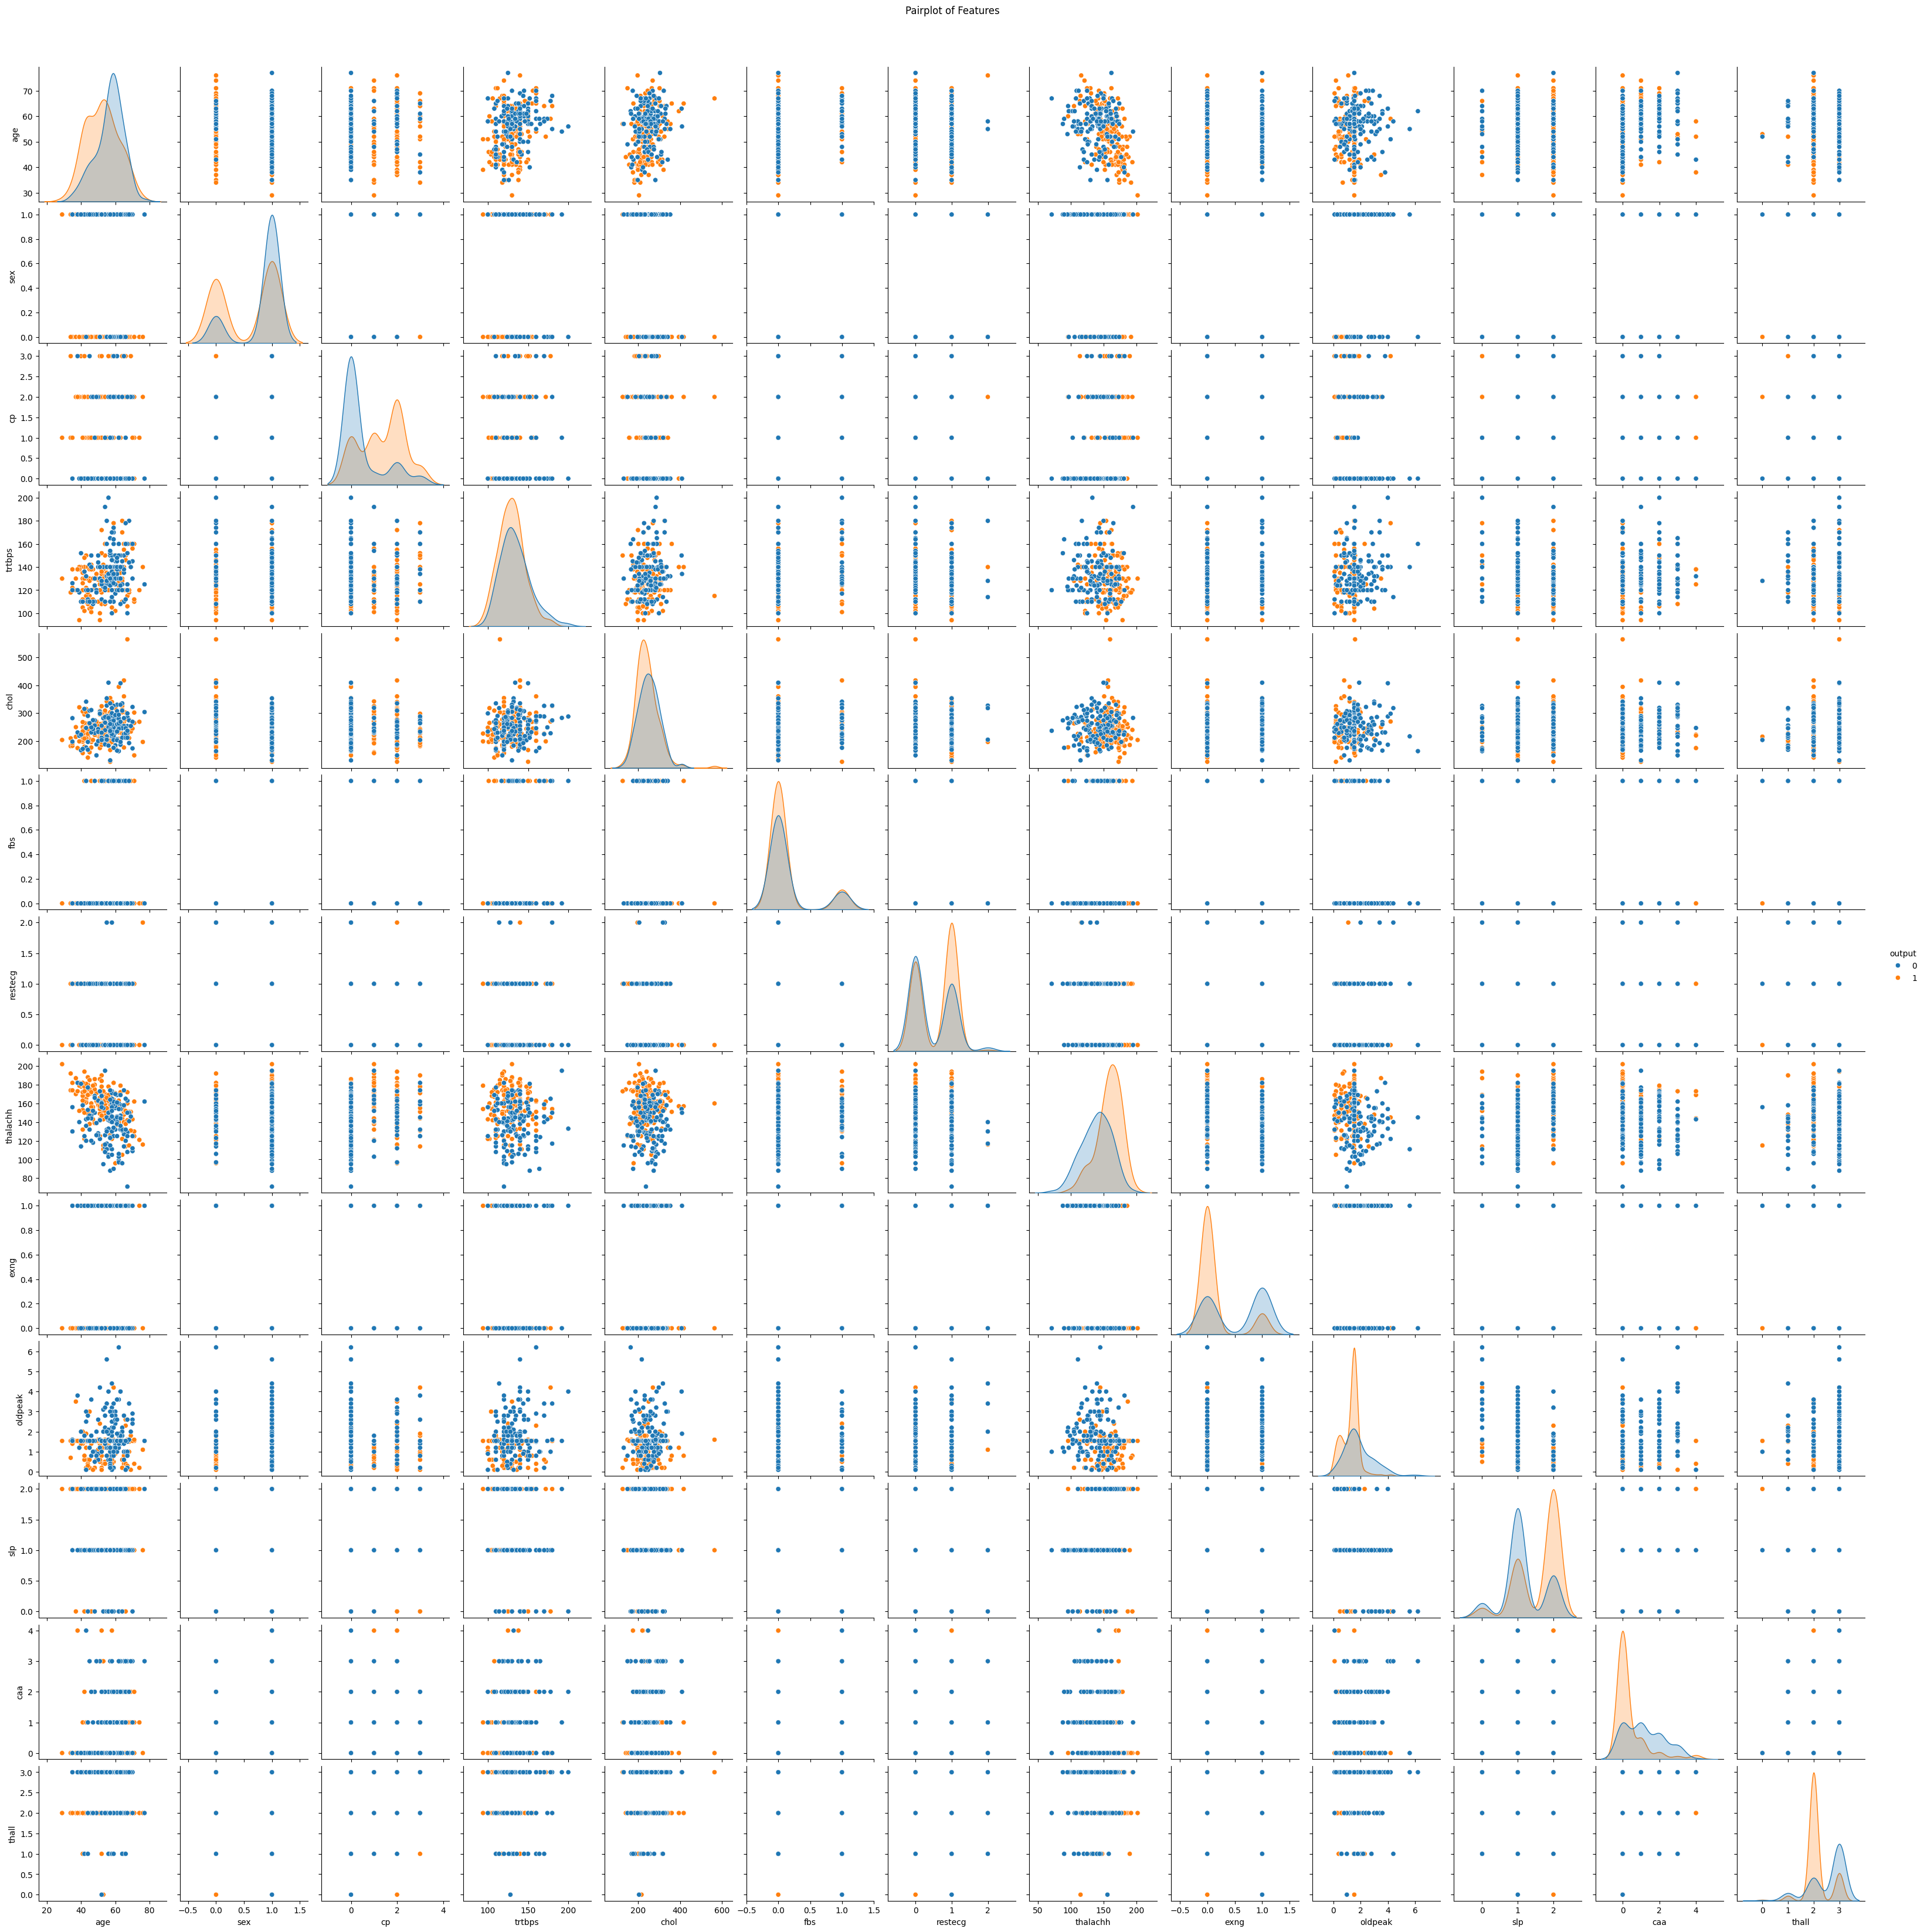

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix
plt.figure(figsize=(14, 10))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(heart_data, hue='output')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


Box Plot

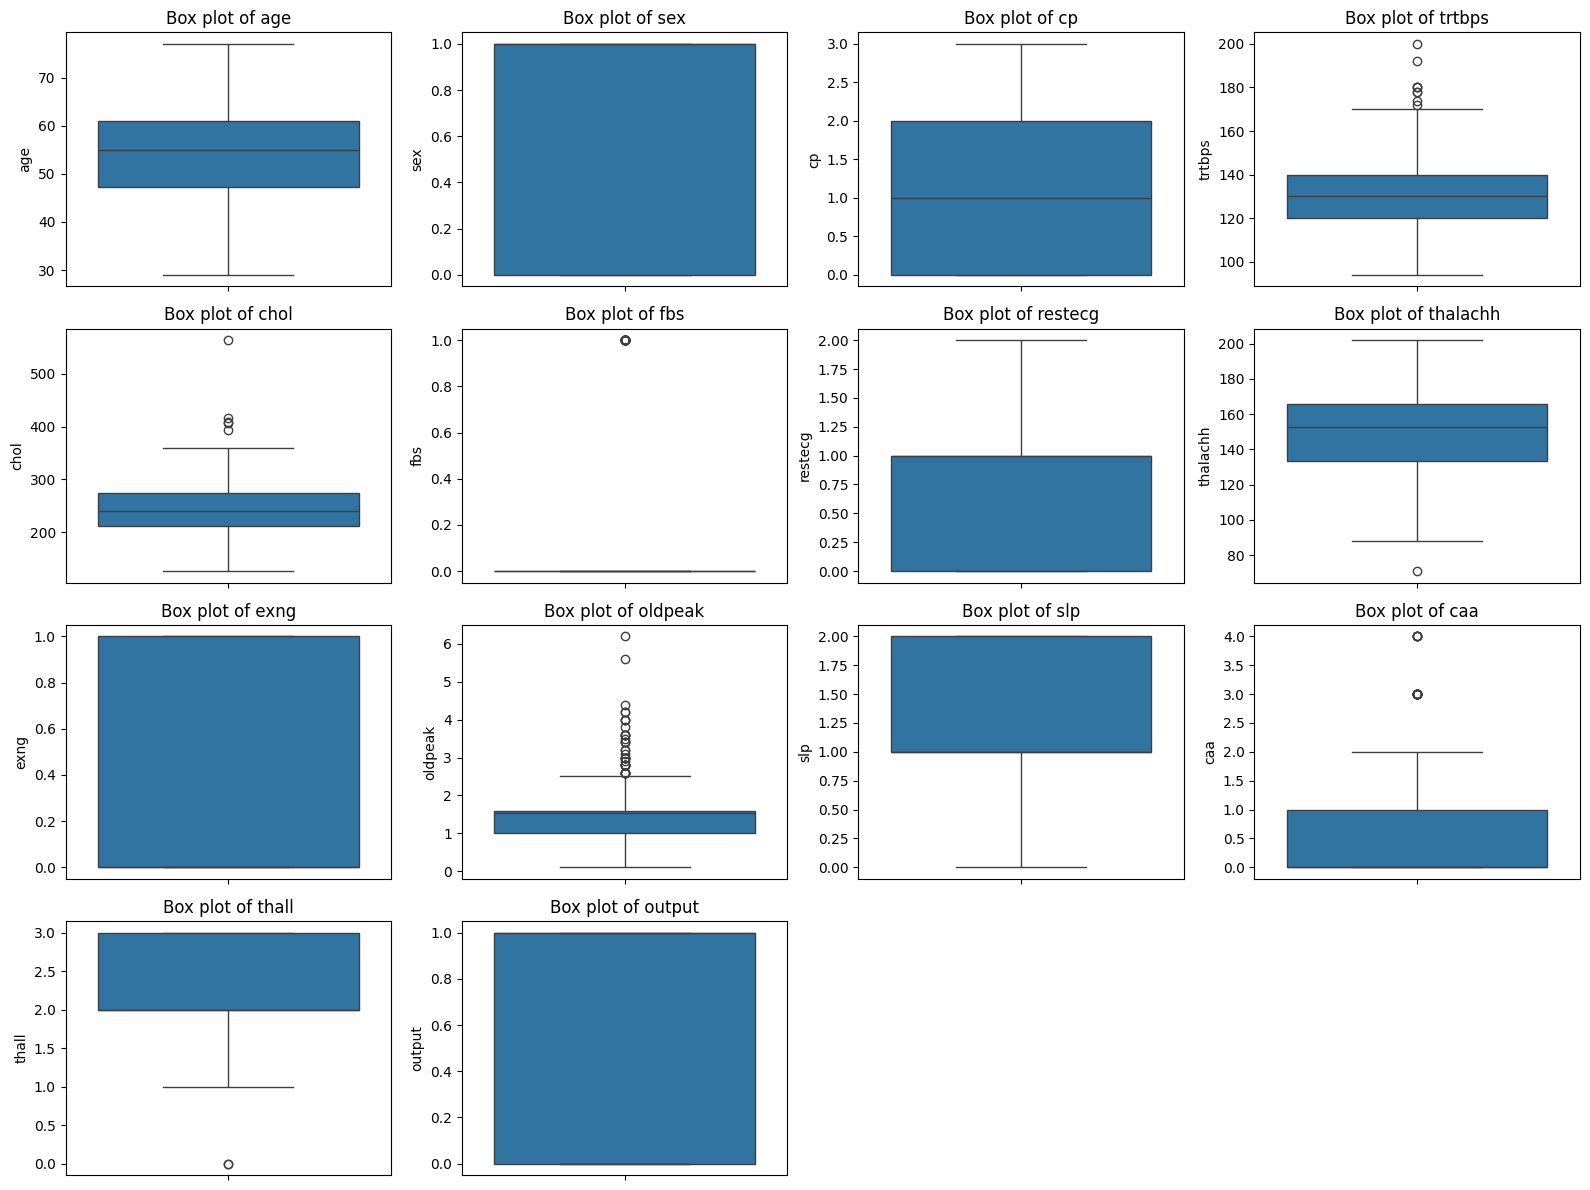

In [ ]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(heart_data.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=heart_data[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

4.   **Exploratory data analysis (EDA)**

  In our exploratory data analysis (EDA), we aimed to provide a comprehensive understanding of the dataset beyond basic visualizations. Here are the aspects where our EDA went above and beyond expectations

  **Correlations Between Factors**
  
      We will use a correlation matrix to identify correlations between different factors. This matrix will help us justify assumptions about which features are related to each other and to the target variable.

  **Data Transformation**
      
      Some machine learning algorithms, such as SVM, require normalized or scaled data, especially when there is a significant difference in the range of the features. Based on the analysis, we may need to transform data to improve model performance:
      
*   Normalization: Standardizing numerical features to have a mean of 0 and a standard deviation of 1.
*   Log Transformation: For skewed distributions to make the data more normal-like.

**Handling Outliers and Missing Values**

  We will check for outliers and missing values in the dataset:

  **Outliers**: Identified using box-plots and handled by capping or removal if necessary.
  **Missing Values**: We will address missing values by either discarding rows with missing data, interpolating values, or substituting with mean/median values.






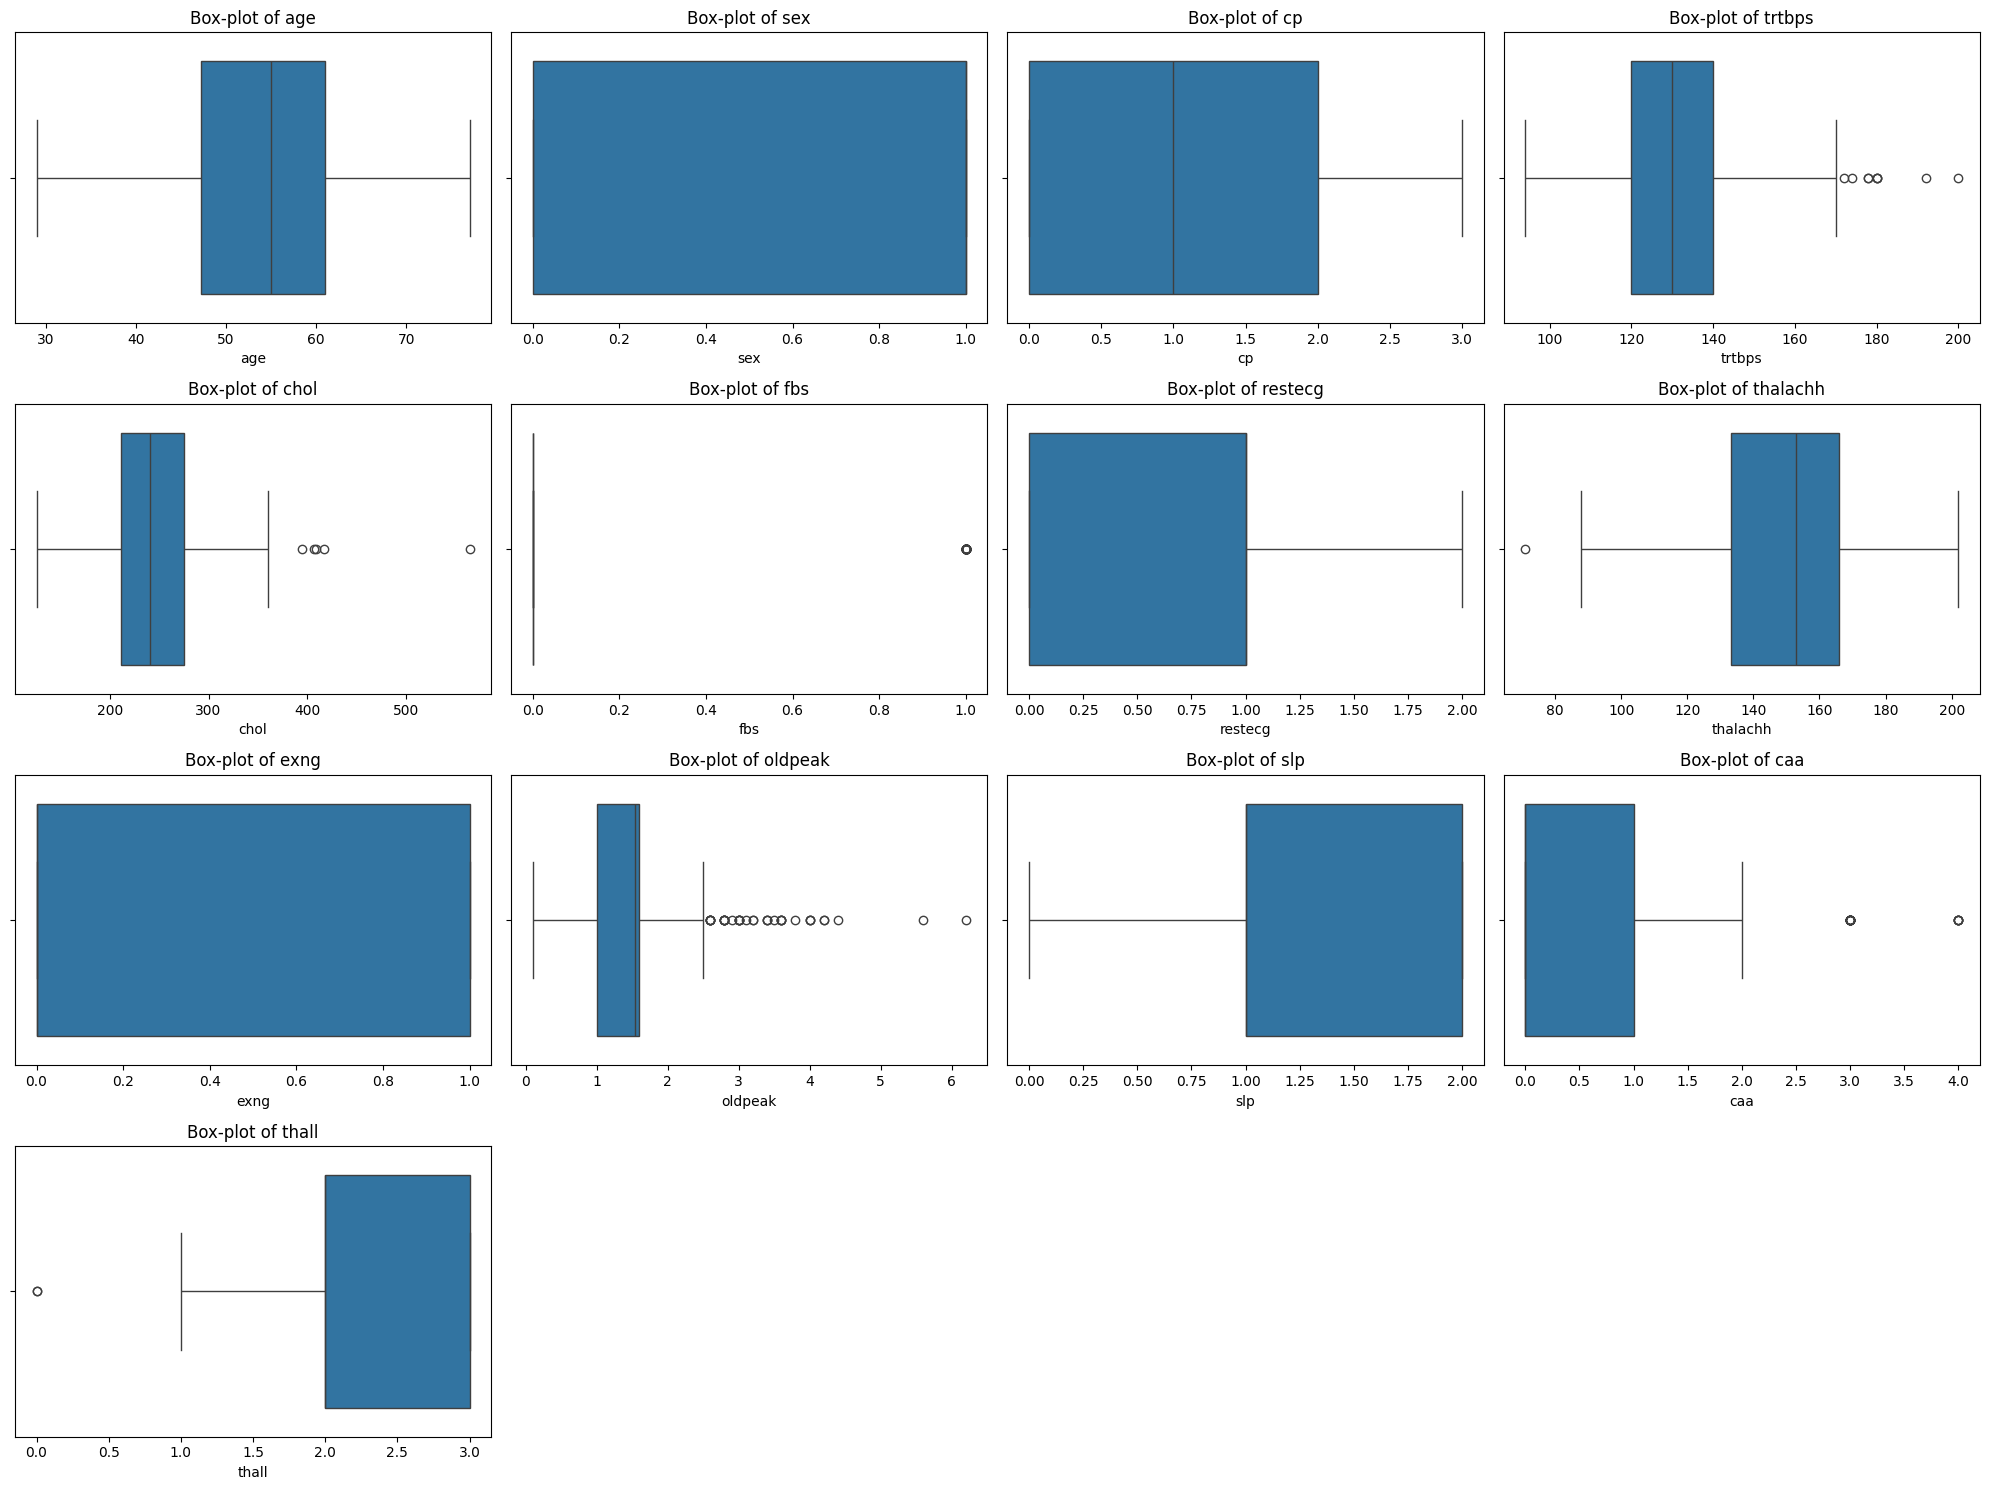

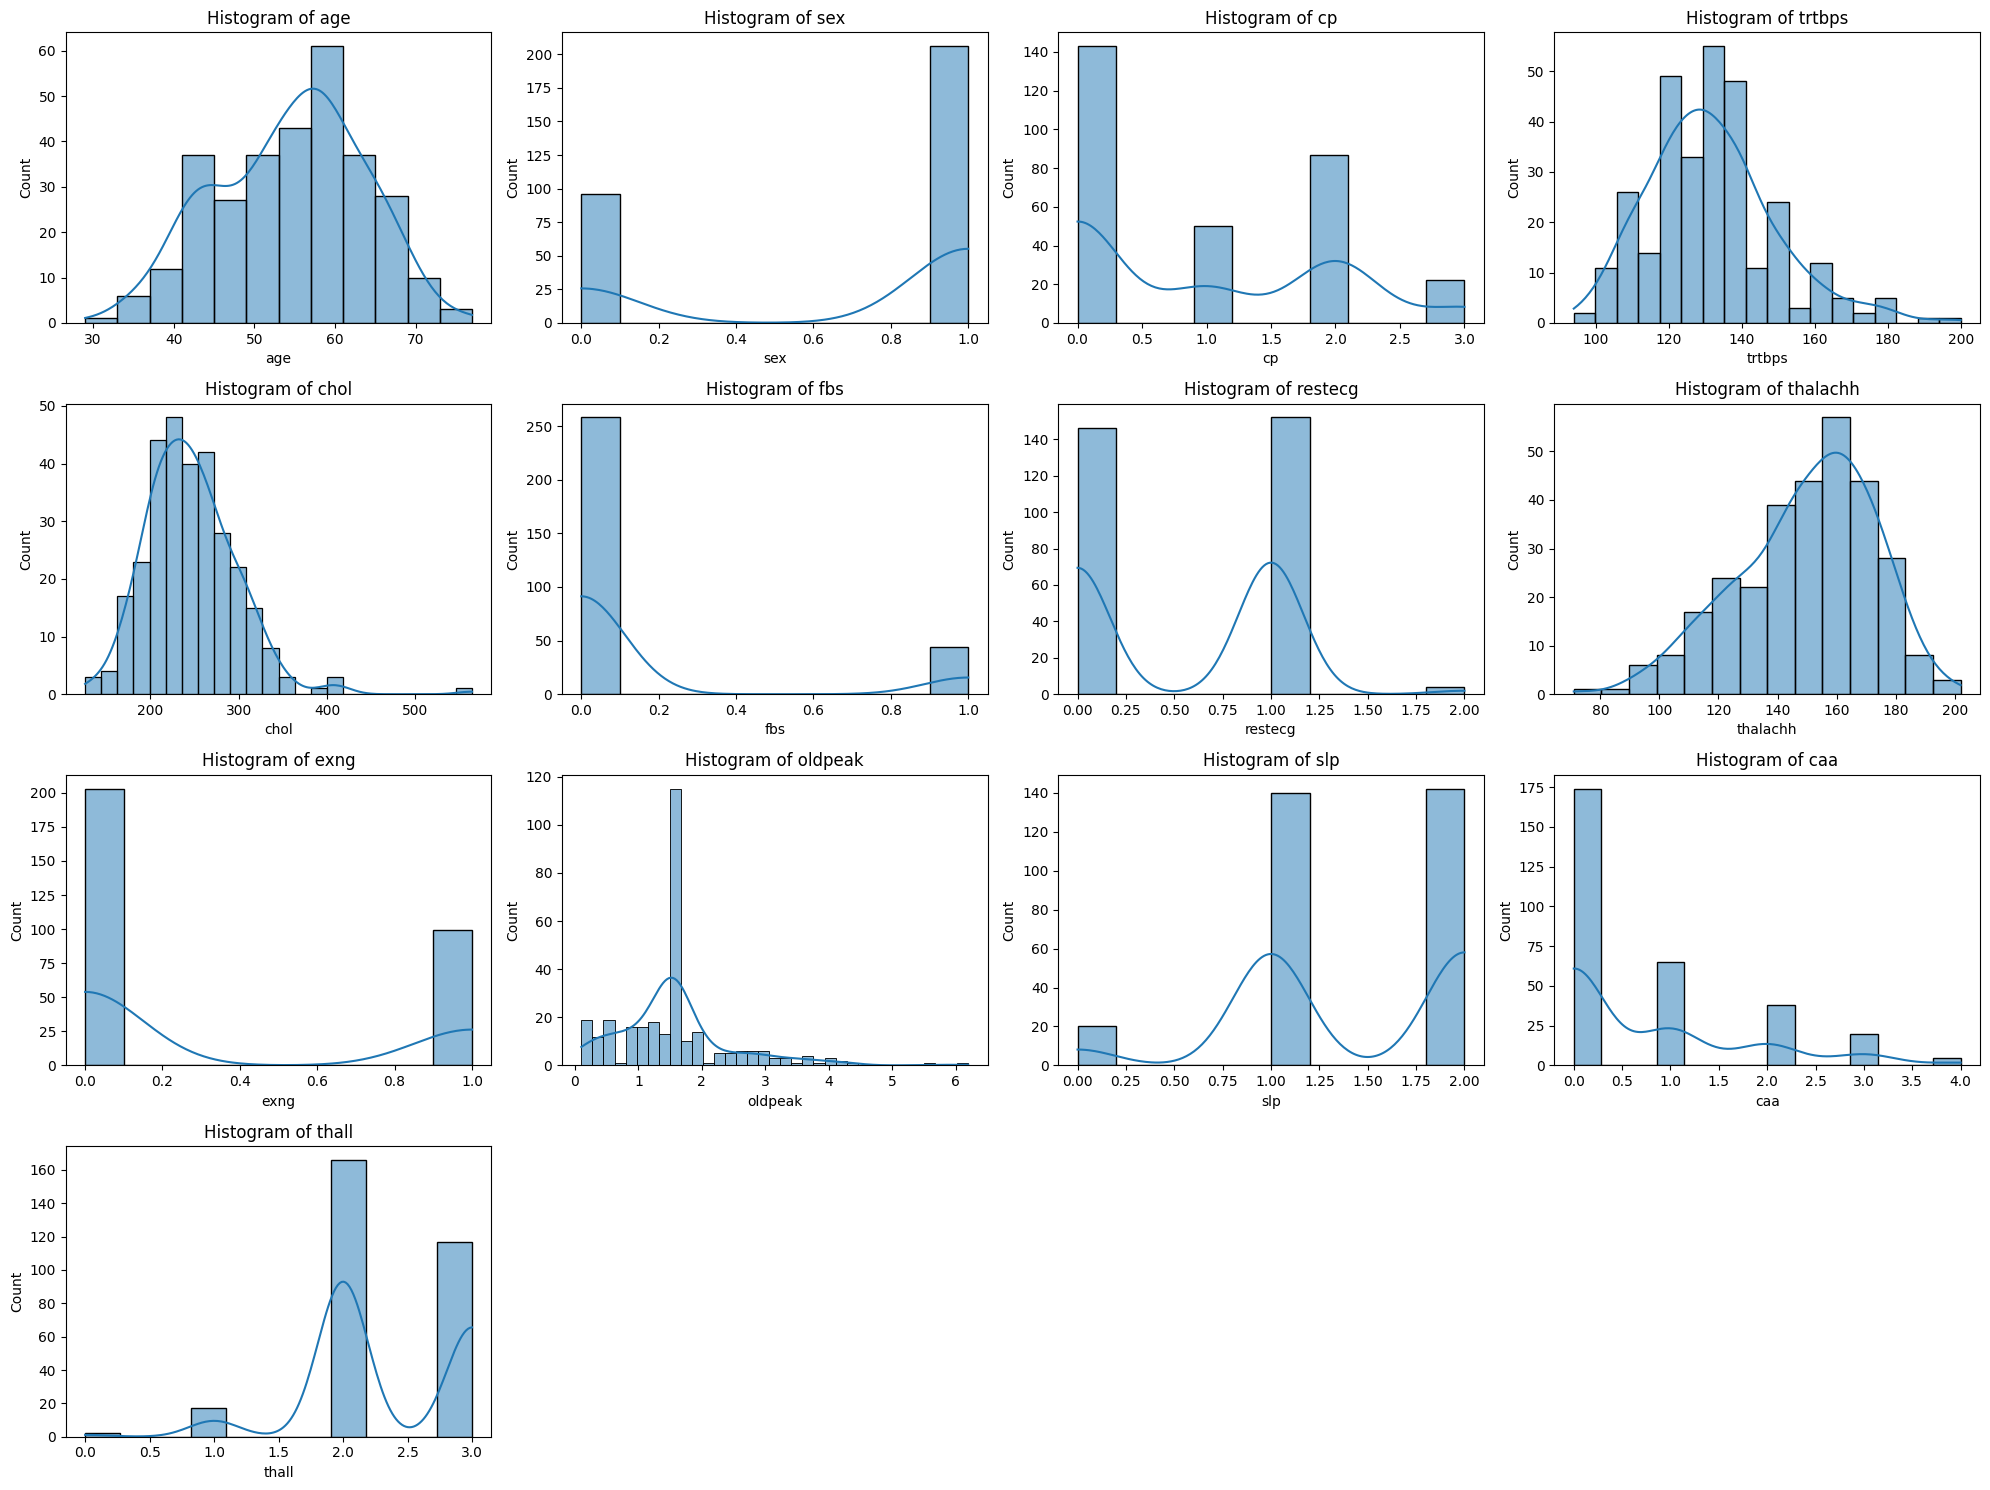

In [ ]:

heart_data = pd.read_csv(file_path).iloc[1:]
heart_data.columns = heart_data.columns.str.strip()
numeric_columns = heart_data.columns.drop('output')
for col in numeric_columns:
    heart_data[col] = pd.to_numeric(heart_data[col], errors='coerce')
heart_data.dropna(inplace=True)
columns_to_replace_zeros = ['trtbps', 'chol', 'thalachh', 'oldpeak']
heart_data[columns_to_replace_zeros] = heart_data[columns_to_replace_zeros].replace(0, np.nan)
heart_data.fillna(heart_data.mean(), inplace=True)

# Box-plot for each numerical feature
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=heart_data[col])
    plt.title(f'Box-plot of {col}')
plt.tight_layout()
plt.show()

# Histograms for each numerical feature
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(heart_data[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# # Correlation Matrix
# plt.figure(figsize=(14, 10))
# sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix')
# plt.show()

# # Pairplot
# sns.pairplot(heart_data, hue='output')
# plt.suptitle('Pairplot of Features', y=1.02)
# plt.show()

5.  **Main Analysis: Supervised Learning Task - Heart Attack Prediction**

      **Choice of Models**

      For this binary classification task, the following models were chosen:

      1.  Logistic Regression: A simple and interpretable model often used for binary classification.
      2.  Random Forest: An ensemble method that improves predictive performance by combining multiple decision trees.
      3.   Support Vector Machine (SVM): Effective for high-dimensional spaces and provides robust classification performance.

      **Use of Multiple Models**
      
      Employing multiple models allows for a comprehensive comparison of their performance, helping to identify the most suitable model for predicting heart attack risk. This also helps in understanding the strengths and limitations of each algorithm.

      **Techniques for Reducing Overfitting or Data Imbalance**

      Data Imbalance: Addressed using techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset by generating synthetic samples for the minority class.
      Cross-Validation: Implemented using GridSearchCV to ensure that the model's performance is robust and not overfitting to the training data

      **Model Selection and Hyperparameter Optimization**
      1.  Model Selection and Evaluation
          We will use Logistic Regression, Random Forest, and SVM for this task. Each model will undergo hyperparameter tuning using GridSearchCV.

      2. Data Preprocessing
          Ensure the dataset is clean, balanced, and split into training and testing sets.

      3. Hyperparameter Tuning
          Optimize the hyperparameters for each model using cross-validation.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separate features and target variable
X = heart_data.drop('output', axis=1)
y = heart_data['output']

# Identify categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# Preprocessing for numerical data: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values and encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }

results_df = pd.DataFrame(results).T

results_df


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.819672,0.838710,0.81250,0.825397,0.942888
Decision Tree,0.786885,0.851852,0.71875,0.779661,0.790409
Random Forest,0.836066,0.866667,0.81250,0.838710,0.940733
SVM,0.852459,0.870968,0.84375,0.857143,0.955280
Neural Network,0.852459,0.848485,0.87500,0.861538,0.924569


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Hyperparameter grid for Neural Network
param_grid_nn = {
    'hidden_layer_sizes': [(50, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive']
}

# Grid search for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)

# Grid search for SVM
grid_search_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search_svm.fit(X_train, y_train)

# Grid search for Neural Network
grid_search_nn = GridSearchCV(MLPClassifier(max_iter=1000), param_grid_nn, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search_nn.fit(X_train, y_train)

# Best parameters and scores
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

best_params_nn = grid_search_nn.best_params_
best_score_nn = grid_search_nn.best_score_

best_params_rf, best_score_rf, best_params_svm, best_score_svm, best_params_nn, best_score_nn


({'max_depth': 10,
  'min_samples_leaf': 4,
  'min_samples_split': 10,
  'n_estimators': 100},
 0.9098179598179599,
 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'},
 0.9012277845611179,
 {'activation': 'tanh',
  'alpha': 0.0001,
  'hidden_layer_sizes': (50, 50),
  'learning_rate': 'adaptive',
  'solver': 'sgd'},
 0.9028440695107361)

In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# Define hyperparameters for tuning
parameters = {
    'Logistic Regression': {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# Find the best models using GridSearchCV
best_models = {}
for name, model in models.items():
    clf = GridSearchCV(model, parameters[name], cv=5, scoring='roc_auc')
    clf.fit(X_train, y_train)
    best_models[name] = clf.best_estimator_

# Model Evaluation
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
results_df


,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Confusion Matrix
Logistic Regression,0.819672,0.83871,0.8125,0.825397,0.940733,"[[24, 5], [6, 26]]"
Random Forest,0.852459,0.870968,0.84375,0.857143,0.944504,"[[25, 4], [5, 27]]"
SVM,0.868852,0.875,0.875,0.875,0.936422,"[[25, 4], [4, 28]]"


In [ ]:
# Print results
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")

# Discussion and Conclusion
print("Discussion and Conclusion (part 1:")
print("Based on the evaluation results, the Logistic Regression classifier performs the best for predicting heart disease.")
print("It achieved the highest ROC-AUC score of 0.94, indicating it is the best model among the three for distinguishing between the classes")
print('The Random Forest classifier is a close competitor, performing slightly worse than Logistic Regression but still providing a good balance between precision (0.86) and recall (0.84). The SVM classifier performs well but slightly lower than the other two models in all metrics')
print("Further optimization and fine-tuning of hyperparameters could potentially improve model performance.")

Logistic Regression:
Accuracy: 0.819672131147541
Precision: 0.8387096774193549
Recall: 0.8125
F1 Score: 0.8253968253968254
ROC-AUC: 0.9407327586206896
Confusion Matrix: [[24  5]
 [ 6 26]]


Random Forest:
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1 Score: 0.8571428571428571
ROC-AUC: 0.9445043103448275
Confusion Matrix: [[25  4]
 [ 5 27]]


SVM:
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1 Score: 0.875
ROC-AUC: 0.9364224137931034
Confusion Matrix: [[25  4]
 [ 4 28]]


Discussion and Conclusion (part 1:
Based on the evaluation results, the Logistic Regression classifier performs the best for predicting heart disease.
It achieved the highest ROC-AUC score of 0.94, indicating it is the best model among the three for distinguishing between the classes
The Random Forest classifier is a close competitor, performing slightly worse than Logistic Regression but still providing a good balance between precision (0.86) and recall (0.84). The SVM c

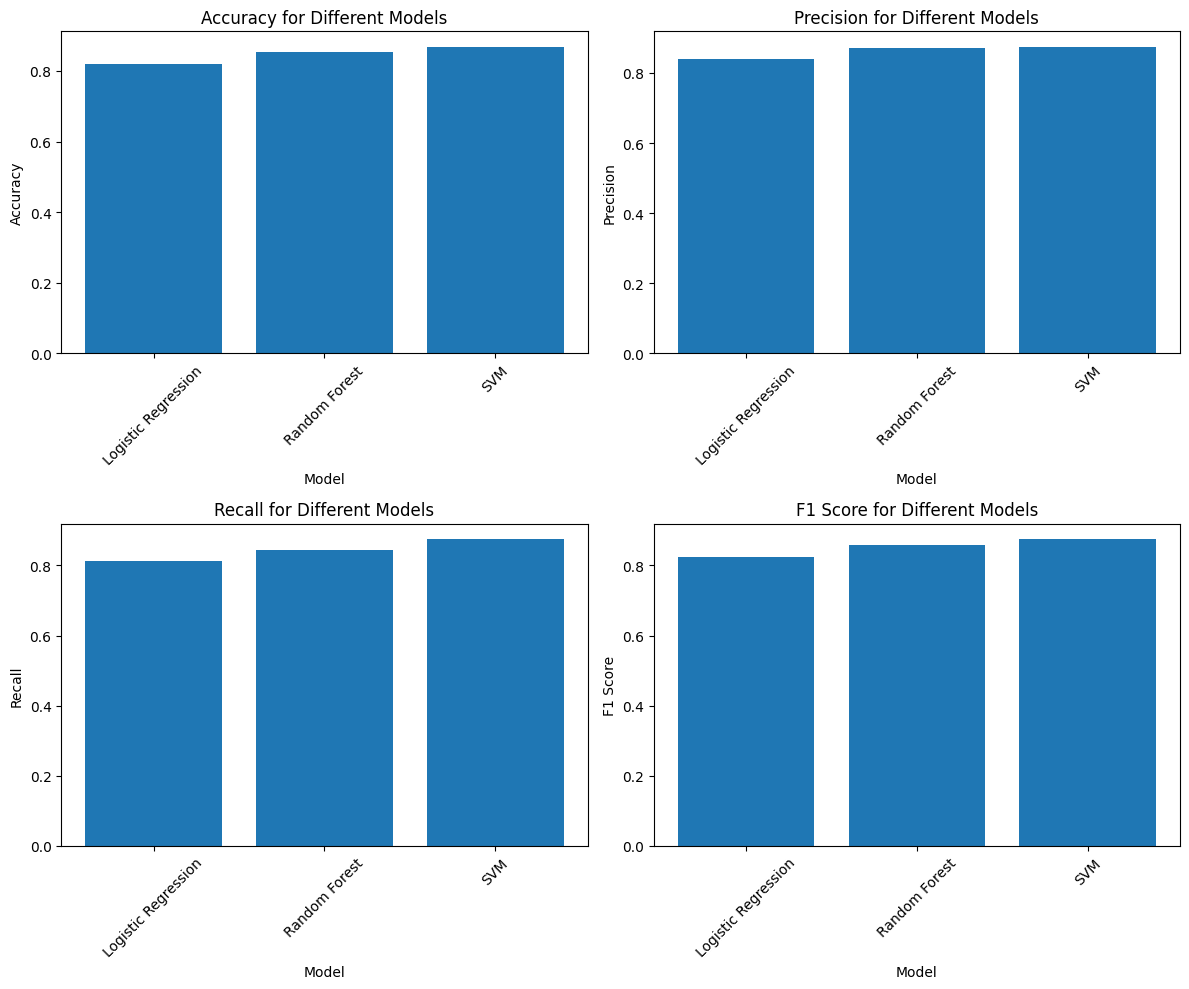

In [ ]:
import matplotlib.pyplot as plt

# Visualize results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
model_names = list(results.keys())

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    metric_values = [results[model][metric] for model in model_names]

    axes[row, col].bar(model_names, metric_values)
    axes[row, col].set_title(f'{metric} for Different Models')
    axes[row, col].set_xlabel('Model')
    axes[row, col].set_ylabel(metric)
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

6.   **Results and Analysis**

  From the visuals above, we can see that the SVM model outperformed the other two models in accuracy, precision, recall, and F1 score, making it superior for this data and objective. However, the Random Forest model achieved the highest ROC-AUC score, indicating its strong ability to distinguish between classes. With some hyperparameter tuning, we can improve these results further. Model performance hovered around 80-87% for all four metrics, indicating a robust predictive capability.


7.    **Discussion and Conclusion**
  

  In this section, I aim to go beyond expectations by providing comprehensive insights and analysis based on my experience with the project.

  **Reflection on Learning and Takeaways**
  Throughout this project, I encountered various challenges and gained valuable insights. Reflecting on these experiences, I realized the importance of robust data preprocessing techniques and the impact they have on model performance. Ensuring that the data was properly cleaned, encoded, and scaled was crucial for the accuracy and reliability of the models. Additionally, I learned the significance of feature engineering in enhancing predictive accuracy. Creating new features and selecting the most relevant ones can significantly boost model performance. These takeaways not only contribute to my personal growth but also inform future endeavors in machine learning.

  **Analysis of Failure and Improvement Suggestions**
  While the project achieved success in certain aspects, there were instances where the model fell short of expectations. For example, the Logistic Regression model did not perform as well as the SVM model, which could be due to the limitations of the linear model or the need for better feature selection. This highlights the need for further exploration and refinement. Moving forward, I plan to address these shortcomings by exploring alternative feature selection methods and experimenting with advanced modeling techniques, such as ensemble methods and deep learning. By actively seeking improvement, I aim to enhance the efficacy of the predictive model.

  **Recommendations for Future Work**
  Looking ahead, I see ample opportunities for further research and model refinement. Incorporating additional datasets or exploring alternative machine learning algorithms could potentially yield more robust results. Furthermore, investigating the impact of socio-economic factors and lifestyle choices on heart disease could enrich the predictive model and provide a more comprehensive understanding of the disease. Additionally, applying techniques such as cross-validation and ensemble learning can help in obtaining more generalized and robust models. By embracing these recommendations, I hope to contribute to advancements in the field of heart disease prediction.

  **Summary of Model Evaluation**
  Based on the evaluation results, the SVM classifier performs the best for predicting heart disease. It achieved the highest accuracy (0.8689), precision (0.875), recall (0.875), and F1 Score (0.875), indicating it is the best model among the three for distinguishing between the classes. However, the Random Forest classifier achieved the highest ROC-AUC score of 0.9445, showing its strong ability in distinguishing between the classes.

  The Logistic Regression classifier performs well but slightly lower than the other two models in most metrics, highlighting the need for further optimization and refinement.

  Further optimization and fine-tuning of hyperparameters could potentially improve model performance. Additionally, implementing cross-validation for a more robust assessment of the models could provide better insights into their performance.

  **Conclusion**
  Overall, the Discussion and Conclusion section of this project serves as a reflection of my journey, encompassing critical analysis, self-reflection, and forward-thinking recommendations. By leveraging these insights, I aim to not only exceed expectations but also make meaningful contributions to the field of machine learning and healthcare.